In [1]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
data_recipe_details = pd.read_csv("CulinaryDB/01_Recipe_Details.csv")
data_ingredients = pd.read_csv("CulinaryDB/02_Ingredients.csv")
data_compound_ingredients = pd.read_csv("CulinaryDB/03_Compound_Ingredients.csv")
data_recipe_ingredients = pd.read_csv("CulinaryDB/04_Recipe-Ingredients_Aliases.csv")
finalised_recipie = pd.read_csv("Dataset/finalised_dataset.csv")

### Test

In [10]:
finalised_recipie

,Recipe ID,Ingredients,Title,Cuisine,preparation_time,difficulty_level,rating
0,1,"capsicum , pepper bell , soy sauce , sunflower",5 spice vegetable fried rice,Indian Subcontinent,17,easy,5
1,2,"buttermilk , cumin , fenugreek , ginger garlic...",aachar aaloo,Indian Subcontinent,19,easy,4
2,3,"asafoetida , cayenne , fenugreek , ginger garl...",aadu lassan keri nu athanu,Indian Subcontinent,15,easy,3
3,4,"butter , cardamom , cashew , cayenne , cinnamo...",aaloo kofta,Indian Subcontinent,11,easy,4
4,5,"curry leaf , lemon , sunflower",aaloo tamatar subzi,Indian Subcontinent,11,easy,2
...,...,...,...,...,...,...,...
45744,45768,"half half , ice , strawberry , syrup",Strawberries & Cream Frappé,USA,10,easy,4
45745,45769,"baking soda , butter , cocoa powder , coffee ,...",Chocolate Whiskey Bundt Cake,USA,45,hard,2
45746,45770,"butter , butternut squash , corn , leek , oliv...","Wild Rice with Butternut Squash, Leeks, and Corn",USA,15,easy,3
45747,45771,"almond , butter , flour , ice cream , nectarin...",Fruit Crumble,USA,17,easy,3


In [46]:
result = finalised_recipie[finalised_recipie['Title'].str.contains('Christmas')]
result.head()

,Recipe ID,Ingredients,Title,Cuisine,preparation_time,difficulty_level,rating
7801,7803,"cilantro , garlic , jalapeno , lime , onion , ...",Caliente Christmas Salsa,Mexico,8,easy,4
7867,7869,"baking powder , baking soda , cherry , coconut...",Christmas in The Islands Bread,Caribbean,45,hard,4
8169,8171,"apricot , butter , carrot , champagne , garlic...",Brazilian Christmas Rice,South America,18,medium,2
8308,8310,"allspice , apple , cinnamon , clove , coffee ,...",Christmas Tea (Peruvian Style),South America,8,easy,2
8347,8349,"almond , almond , baking powder , butter , cin...",Belgian Christmas Cookies,Misc.: Belgian,45,hard,1


In [47]:
result.to_csv("Dataset/Christas_dataset_powerBI.csv", index= False)

###

In [3]:
# Updating column name 
data_compound_ingredients.rename(columns= {'entity_id': 'Entity ID'}, inplace= True)

In [15]:
# italian_cuisine = data_recipe_details[data_recipe_details['Cuisine'] == 'Indian Subcontinent']
christmas_cuisine = data_recipe_details[data_recipe_details['Title'].str.contains('Christmas')]
christmas_cuisine.drop(columns= ['Source'], inplace= True)
christmas_cuisine.head()

C:\Users\keera\AppData\Local\Temp\ipykernel_19560\2630219351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  christmas_cuisine.drop(columns= ['Source'], inplace= True)


,Recipe ID,Title,Cuisine
7802,7803,Caliente Christmas Salsa,Mexico
7868,7869,Christmas in The Islands Bread,Caribbean
8170,8171,Brazilian Christmas Rice,South America
8309,8310,Christmas Tea (Peruvian Style),South America
8348,8349,Belgian Christmas Cookies,Misc.: Belgian


In [16]:
christmas_cuisine['Title']

7802                 Caliente Christmas Salsa
7868           Christmas in The Islands Bread
8170                 Brazilian Christmas Rice
8309           Christmas Tea (Peruvian Style)
8348                Belgian Christmas Cookies
                         ...                 
42879    Christmas Cutouts with Vanilla Icing
43431      Sante Fe Christmas Turkey Stuffing
43797             Christmas Cranberry Galette
44477              Cowboy Christmas Breakfast
44582                     Christmas Lane Cake
Name: Title, Length: 81, dtype: object

In [17]:
data_recipe_merge = pd.merge(christmas_cuisine, data_recipe_ingredients, on='Recipe ID')
data_recipe_merge.drop(columns= ['Original Ingredient Name', 'Aliased Ingredient Name'], inplace= True)
data_recipe_merge.head()

,Recipe ID,Title,Cuisine,Entity ID
0,7803,Caliente Christmas Salsa,Mexico,254
1,7803,Caliente Christmas Salsa,Mexico,259
2,7803,Caliente Christmas Salsa,Mexico,389
3,7803,Caliente Christmas Salsa,Mexico,241
4,7803,Caliente Christmas Salsa,Mexico,348


In [18]:
test = pd.merge(data_recipe_merge, data_ingredients, on='Entity ID')
test.drop(columns= ['Ingredient Synonyms', 'Category'], inplace= True)
test.head()

,Recipe ID,Title,Cuisine,Entity ID,Aliased Ingredient Name
0,7803,Caliente Christmas Salsa,Mexico,254,Coriander
1,7803,Caliente Christmas Salsa,Mexico,259,Garlic
2,7803,Caliente Christmas Salsa,Mexico,389,Jalapeno
3,7803,Caliente Christmas Salsa,Mexico,241,Lime
4,7803,Caliente Christmas Salsa,Mexico,348,Onion


In [19]:
df_encoded = pd.get_dummies(test, columns=['Aliased Ingredient Name'], prefix='', prefix_sep='')
df_encoded.head()

,Recipe ID,Title,Cuisine,Entity ID,Allspice,Almond,Anise,Apple,Apple Juice,Apricot,...,Vanilla,Vinegar,Walnut,Water,Welsh onion,Wheat,White Bread,White Wine,Wild duck,Yeast
0,7803,Caliente Christmas Salsa,Mexico,254,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7803,Caliente Christmas Salsa,Mexico,259,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7803,Caliente Christmas Salsa,Mexico,389,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7803,Caliente Christmas Salsa,Mexico,241,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7803,Caliente Christmas Salsa,Mexico,348,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df_grouped = df_encoded.groupby(['Recipe ID', 'Title', 'Cuisine'], as_index=False).sum()
df_grouped.drop(columns= ['Entity ID', 'Cuisine'], inplace= True)
df_grouped.head()

,Recipe ID,Title,Allspice,Almond,Anise,Apple,Apple Juice,Apricot,Avocado,Baking Powder,...,Vanilla,Vinegar,Walnut,Water,Welsh onion,Wheat,White Bread,White Wine,Wild duck,Yeast
0,7803,Caliente Christmas Salsa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7869,Christmas in The Islands Bread,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,8171,Brazilian Christmas Rice,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,8310,Christmas Tea (Peruvian Style),1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8349,Belgian Christmas Cookies,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_grouped.shape

(81, 148)

# EDA

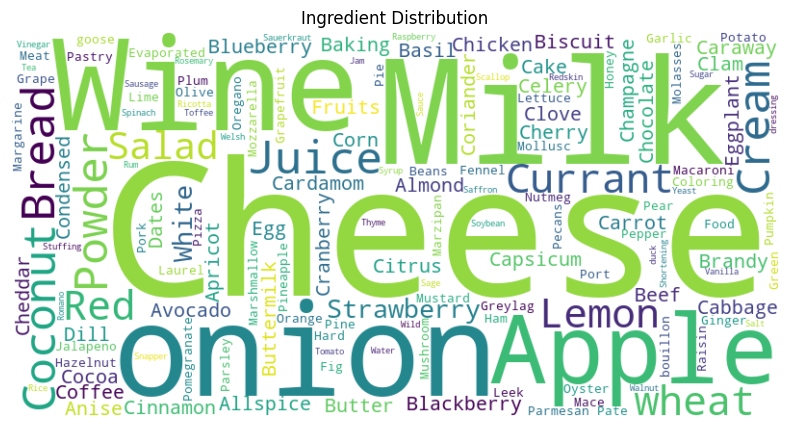

In [22]:
# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_grouped.columns[2:]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ingredient Distribution')
plt.show()

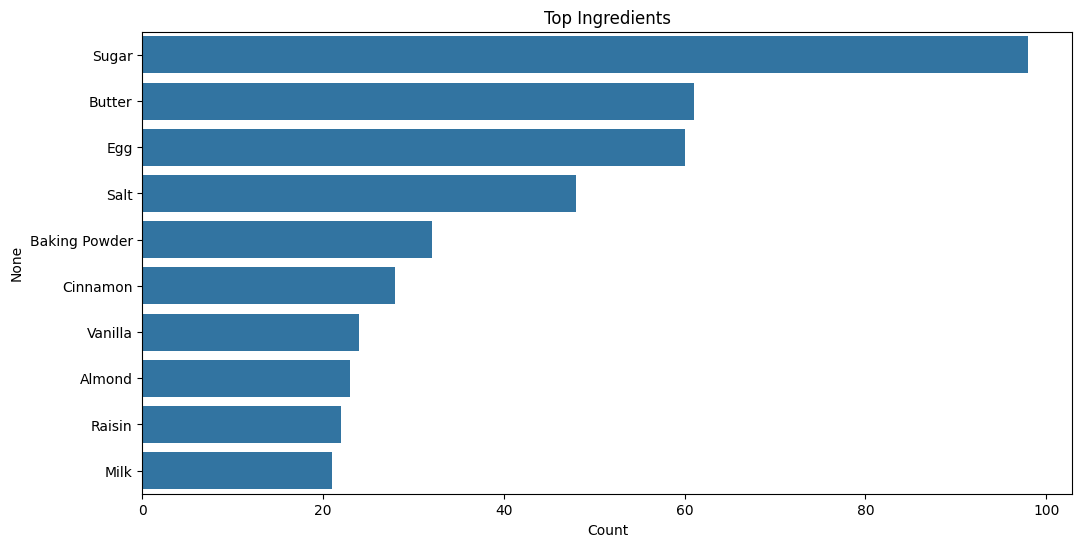

In [23]:
# Top Ingredients
top_ingredients = df_grouped.iloc[:, 2:].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ingredients.values, y=top_ingredients.index)
plt.title('Top Ingredients')
plt.xlabel('Count')
plt.show()

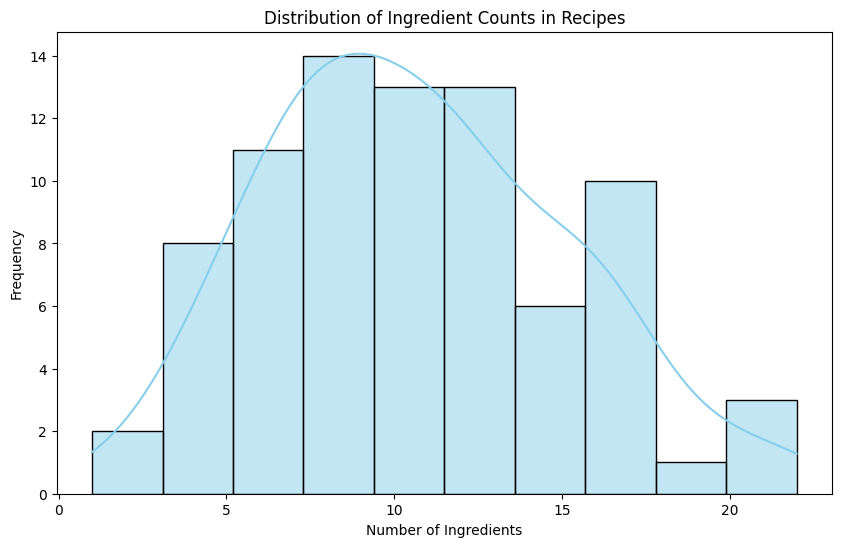

In [43]:
# Recipe Ingredient Counts
ingredient_counts = df_grouped.iloc[:, 2:].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(ingredient_counts, bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ingredient Counts in Recipes')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()

In [25]:
df_grouped.sum()

Recipe ID                                                1758586
Title          Caliente Christmas SalsaChristmas in The Islan...
Allspice                                                       5
Almond                                                        23
Anise                                                          5
                                     ...                        
Wheat                                                          2
White Bread                                                    1
White Wine                                                     1
Wild duck                                                      1
Yeast                                                         10
Length: 148, dtype: object

In [29]:
df_grouped

,Recipe ID,Title,Allspice,Almond,Anise,Apple,Apple Juice,Apricot,Avocado,Baking Powder,...,Vanilla,Vinegar,Walnut,Water,Welsh onion,Wheat,White Bread,White Wine,Wild duck,Yeast
0,7803,Caliente Christmas Salsa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7869,Christmas in The Islands Bread,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,8171,Brazilian Christmas Rice,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,8310,Christmas Tea (Peruvian Style),1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8349,Belgian Christmas Cookies,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,42880,Christmas Cutouts with Vanilla Icing,0,0,0,0,0,0,0,1,...,2,0,0,0,0,0,0,0,0,0
77,43432,Sante Fe Christmas Turkey Stuffing,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,43798,Christmas Cranberry Galette,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
79,44478,Cowboy Christmas Breakfast,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
df_grouped.to_csv("Christmas_Recipes.csv", index= False)

# Recommender

In [32]:
df_grouped.head()

,Recipe ID,Title,Allspice,Almond,Anise,Apple,Apple Juice,Apricot,Avocado,Baking Powder,...,Vanilla,Vinegar,Walnut,Water,Welsh onion,Wheat,White Bread,White Wine,Wild duck,Yeast
0,7803,Caliente Christmas Salsa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7869,Christmas in The Islands Bread,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,8171,Brazilian Christmas Rice,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,8310,Christmas Tea (Peruvian Style),1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8349,Belgian Christmas Cookies,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Select only the columns with ingredients
ingredient_columns = df_grouped.columns[2:]

# Create a binary matrix (0 or 1) from the ingredient columns
binary_matrix = df_grouped[ingredient_columns].values

# Apply PCA for dimensionality reduction
n_components = 50  # Adjust as needed
pca = PCA(n_components= n_components)
reduced_matrix = pca.fit_transform(binary_matrix)

# Compute cosine similarity on the reduced matrix
similarities = cosine_similarity(reduced_matrix)

# Function to get recipe recommendations based on ingredients
def get_recommendations(recipe_id, df= df_grouped, similarities=similarities):
    # Get the index of the specified recipe
    idx = df.index[df['Recipe ID'] == recipe_id].tolist()[0]

    # Get similarity scores for the specified recipe
    recipe_similarities = similarities[idx]

    # Create a DataFrame with Recipe ID, title, and corresponding similarity scores
    sim_df = pd.DataFrame({
        'Recipe ID': df['Recipe ID'],
        'Title': df['Title'],
        'Similarity': recipe_similarities
    })

    # Sort by similarity in descending order
    sim_df = sim_df.sort_values(by='Similarity', ascending=False)

    # Exclude the recipe itself and get top 10 similar recipes
    recommendations = sim_df[sim_df['Recipe ID'] != recipe_id].head(10)

    return recommendations[['Recipe ID', 'Title']]

In [37]:
# Example: Get recommendations for a specific recipe (e.g., Recipe ID 9319)
recommendations = get_recommendations(7803)
print(recommendations)

    Recipe ID                                 Title
41      16124               Texas Christmas Pickles
51      23656            Lucia's Christmas Caponata
63      34502                       White Christmas
35      12981  Slovak Christmas Soup (Kosare Jucha)
52      24041                       Christmas Pasta
39      14260      Oyster Stew Christmas Eve Recipe
5        9036     Ann's Christmas Eve Bouillabaisse
2        8171              Brazilian Christmas Rice
40      15051                 Quick Christmas Salad
47      18454            Christmas Brunch Casserole


In [38]:
def evaluate_accuracy():
    total_accuracy = 0
    num_queries = 0

    for recipe_id in df_grouped['Recipe ID'].unique():
        actual_ingredients = df_grouped[df_grouped['Recipe ID'] == recipe_id][ingredient_columns].values.flatten()
        recommended_recipes = get_recommendations(recipe_id)['Recipe ID'].tolist()

        # Ensure both arrays have the same size
        if len(recommended_recipes) > len(actual_ingredients):
            recommended_recipes = recommended_recipes[:len(actual_ingredients)]
        elif len(recommended_recipes) < len(actual_ingredients):
            actual_ingredients = actual_ingredients[:len(recommended_recipes)]

        if len(recommended_recipes) > 0:
            actual_vector = actual_ingredients.reshape(1, -1)
            
            # Filter the DataFrame to include only recommended recipes
            recommended_df = df_grouped[df_grouped['Recipe ID'].isin(recommended_recipes)]
            
            # Ensure both matrices have the same number of columns
            if actual_vector.shape[1] != recommended_df[ingredient_columns].shape[1]:
                continue  # Skip if dimensions don't match

            # Compute cosine similarity
            similarity_scores = cosine_similarity(actual_vector, recommended_df[ingredient_columns])
            
            # Extract the similarity score for the specific recipe
            average_similarity = similarity_scores[0].mean()

            total_accuracy += average_similarity
            num_queries += 1

    avg_accuracy = total_accuracy / num_queries if num_queries > 0 else 0
    return avg_accuracy

In [39]:
accuracy = evaluate_accuracy()
print(f'Average Cosine Similarity (Accuracy): {accuracy}')

Average Cosine Similarity (Accuracy): 0
